(Notas Serie de Fouries y graficación para solución en series de Lu=f)

A. Martín Ramírez Rabelo

Introducción a la Investigación I.

# Series de Fourier

Una serie de Fourier es una serie infinita que converge puntualmente a una función periódica y continua a trozos(o por partes). Las series de Fourier son una herramienta para analizar funciones periódicas a través de la descomposición de dicha función en una suma infinita de funciones senoidales mucho más simples (como combinación de senos y cosenos con frecuencias enteras). Una serie de Fourier tiene la forma: 

$
f(t)=\frac{a_{0}}{2}+\sum_{n=1}^{\infty} \left[ a_{n} \cos \left( \frac{2n\pi}{T}t \right) + b_{n} \sin \left( \frac{2n\pi}{T}t \right) \right]
$

donde $a_{n}$ y $b_{n}$ se denominan coeficientes de Fourier de la serie de Fourier de la función $f(x)$.

La serie de Fourier de una señal periódica está definida por sus coeficientes A0, An, y Bn. Se explicará como podemos hallar los coeficientes de Fourier de (una señal cuadrada) haciendo uso de Python, numpy, matplotlib, y sympy.



### Simpy
Sympy es una librería desarrollada en Python que permite realizar matemática simbólica. Esto quiere decir que podemos incluir variables matemáticas realizando operaciones algebraicas entre ellas.  Sympy pretende ser un sistema algebraico computacional completo, libre y con una sintaxis limpia.

Sympy también es multiplataforma como Python por lo que puede ser instalado en cualquier distribución Linux, como en Windows o Mac OS X. Entre otras cosas Sympy ya tiene soporte para Python 3.

Para Ubuntu y distribuciones derivadas, se puede realizar fácilmente desde la consola con la siguiente instrucción:

sudo apt-get install python-sympy


También es necesario tener instalado numpy, scipy, o matplotlib.


sudo apt-get install python-dev python-numpy python-scipy python-matplotlib

### FUNCIÓN ESCALÓN.

#### Gráfica de función  escalón.


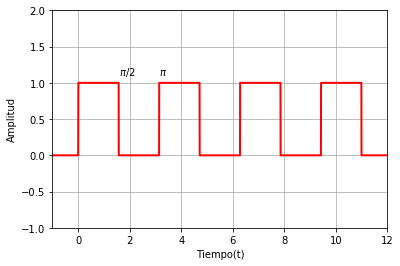

In [3]:
import numpy as np
#import scipy.signal as sp
from scipy import signal as sp
import matplotlib.pylab as plt

amplitud = 1
periodo = np.pi


t = np.linspace(-1, 12, 10000,endpoint=True)
funcion = ((sp.square( 2*t)) * (amplitud / 2.0)) + (amplitud / 2.0)

plt.plot(t, funcion, 'r', lw=2)
plt.grid()
plt.annotate('$\pi$', xy = (periodo, 1.0), xytext = (periodo, 1.1))
plt.annotate('$\pi$/2', xy = (periodo / 2.0, 1) , xytext = (periodo / 2.0, 1.1))
plt.ylabel('Amplitud')
plt.xlabel('Tiempo(t)')
plt.ylim(-1,2)
plt.xlim(-1.0, 12)
plt.show()


Los coeficientes están determinados por las siguientes expresiones: 

$
a_{0}=\frac{2}{T}\int_{0}^{L} f(t) dt \\ 
a_{n}=\frac{2}{T}\int_{0}^{L} f(t)cos(\frac{\pi n}{T}t) dt \\
b_{n}=\frac{2}{T}\int_{0}^{L} f(t)sen(\frac{\pi n}{T}t) dt
$
 
La función cuadrada está dada por: 

$"%!$"
1"$%!
!$%
 
..por lo tanto los coeficientes quedan de la siguiente forma: 

 $%!
 #%"#
 "#$"
 
 Ahora veamos como se pueden hallar estos coeficientes usando sympy: 
 
 

In [5]:
#Importamos todo el modulo sympy
from sympy import *
#ademas importamos las variables simbolicas 'n' y 't'
from sympy.abc import t, n


ao = integrate(2 / pi, (t, 0, pi / 2))
#integramos la funcion (2/pi) cuya variable es 't'
#y limites de integracion entre 0 y pi/2

print("a0 = ")
pprint(ao)
#Usamos la funcion pprint para mostrar ao


an = integrate((2 / pi) * cos(2 * n * t), (t, 0, pi / 2))
#integramos la funcion (2/pi)*cos(2nt)
#Su variable es 't' y sus limites de integracion son 0 y pi/2

print("an = ")
pprint(an)
#Usamos la funcion pprint para mostrar an

bn = together(integrate((2 / pi) * sin(2 * n * t), (t, 0, pi / 2)))
#integramos la funcion (2/pi*cos(2nt)
#Su variable es 't' y sus limites de integracion
#son 0 y pi/2. Ademas usamos la funcion "together"
#para simplificar la expresion

print("bn = ")
pprint(bn)
#Usamos la funcion pprint para mostrar bn


a0 = 
1
an = 
⎧sin(π⋅n)                            
⎪────────  for n > -∞ ∧ n < ∞ ∧ n ≠ 0
⎨  π⋅n                               
⎪                                    
⎩   1              otherwise         
bn = 
⎧  cos(π⋅n)    1                             
⎪- ──────── + ───  for n > -∞ ∧ n < ∞ ∧ n ≠ 0
⎨    π⋅n      π⋅n                            
⎪                                            
⎩       0                  otherwise         


Como podemos ver, la función pprint (pretty print) nos genera una salida con la forma de una ecuación matemática. 
Ahora que tenemos los coeficientes de la serie de Fourier vamos a completar la serie usando 7 valores para "n" (el numero "n" son numero enteros que van a ser múltiplos de la frecuencia fundamental. En otras palabras, la cantidad de armónicos con la que vamos a tratar de reconstruir la función inicial)

In [70]:
print( "f(x) = ")

serie = (ao/2)+\
((an*cos(2*n*t)).subs(n,1))+ \
((an*cos(2*n*t)).subs(n,2))+ \
((an*cos(2*n*t)).subs(n,3))+ \
((an*cos(2*n*t)).subs(n,4))+ \
((an*cos(2*n*t)).subs(n,5))+ \
((an*cos(2*n*t)).subs(n,6))+ \
((an*cos(2*n*t)).subs(n,7))+ \
((bn*sin(2*n*t)).subs(n,1))+ \
((bn*sin(2*n*t)).subs(n,2))+ \
((bn*sin(2*n*t)).subs(n,3))+ \
((bn*sin(2*n*t)).subs(n,4))+ \
((bn*sin(2*n*t)).subs(n,5))+ \
((bn*sin(2*n*t)).subs(n,6))+ \
((bn*sin(2*n*t)).subs(n,7))+ (1/ 4)

pprint(serie)

f(x) = 
2⋅sin(2⋅t)   2⋅sin(6⋅t)   2⋅sin(10⋅t)   2⋅sin(14⋅t)       
────────── + ────────── + ─────────── + ─────────── + 0.75
    π           3⋅π           5⋅π           7⋅π           


esta parte del código realiza la sumatoria que se encuentra en la serie de Fourier usando 7 valores de n.

Primero se toma un valor de "an" y se multiplica por cos(2nt). El ".sub(n,1)" se usa para reemplazar en la función el valor de n por el numero especificado y por ultimo se realiza lo mismo con "bn".


Aunque este código funciona, no es la mejor forma para realizarlo ya que por cada armónico que quisiéramos incluir deberíamos agregar una nueva linea por lo que lo mejor seria hacer algo así:


f(x) = 
2⋅sin(2⋅t)   2⋅sin(6⋅t)   2⋅sin(10⋅t)   2⋅sin(14⋅t)   2⋅sin(18⋅t)   2⋅sin(22⋅t
────────── + ────────── + ─────────── + ─────────── + ─────────── + ──────────
    π           3⋅π           5⋅π           7⋅π           9⋅π           11⋅π  

)   2⋅sin(26⋅t)   2⋅sin(30⋅t)   2⋅sin(34⋅t)   2⋅sin(38⋅t)   1
─ + ─────────── + ─────────── + ─────────── + ─────────── + ─
        13⋅π          15⋅π          17⋅π          19⋅π      2


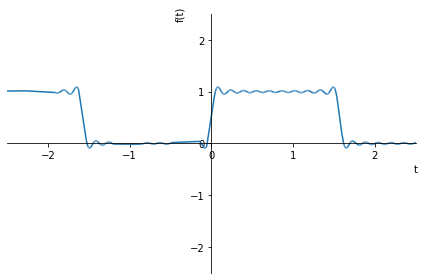

In [7]:
print( "f(x) = ")

armonicos = 20
serie = (ao/2)
for i in range(1, armonicos + 1):
    serie = serie + (an*cos(2*n*t)).subs(n, i)
for j in range(1, armonicos + 1):
    serie = serie + (bn*sin(2*n*t)).subs(n, j)

pprint(serie)
plot(serie, ylim=(-2.5, 2.5), xlim=(-2.5,2.5))

f(x) = 
2⋅sin(2⋅t)   2⋅sin(6⋅t)   2⋅sin(10⋅t)   2⋅sin(14⋅t)   2⋅sin(18⋅t)   1
────────── + ────────── + ─────────── + ─────────── + ─────────── + ─
    π           3⋅π           5⋅π           7⋅π           9⋅π       2


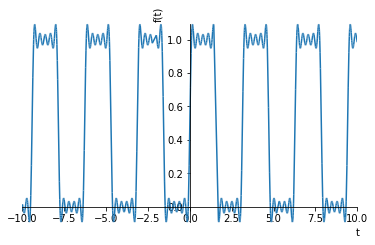

In [40]:
print( "f(x) = ")

armonicos = 10
serie = (ao/2)
for i in range(1, armonicos + 1):
    serie = serie + (an*cos(2*n*t)).subs(n, i)
for j in range(1, armonicos + 1):
    serie = serie + (bn*sin(2*n*t)).subs(n, j)

pprint(serie)
plot(serie)

De esta serie podemos notar varias cosas:

1) El termino "1/2" es el resultado de "ao/2". Este termino es conocido como el offset de la señal, y era de esperarse que en una señal cuadrada con un ciclo del 50% con una amplitud de 1 tenga un offset de 0.5.

2) La serie solo contiene términos en función de senos y ningún coseno. Eso quiere decir que el coeficiente "an" es igual a cero para cualquier "n". Sabemos que:

$an =\frac{sin(π⋅n)}{π⋅n}$

Si nos fijamos, sin(π⋅n) va a ser igual a cero para cualquier valor de "n" (n pertenece a los números enteros: 1,2,3,4,5...)

3) A pesar de que usamos 7 valores enteros para "n" (1,2,3,4,5,6,7). Solo obtuvimos  4 términos sin contar el offset (ya que este se debe a "ao" y no a "an" o "bn"). Esto se debe a que "bn" es igual a cero cuando "n" es un numero par.

$ bn = \frac{1 - cos(π⋅n)}{π⋅n}$

Cuando n toma valores pares (2,4,6), "bn" es igual a cero. Por lo tanto, "bn" solo toma 4 valores que corresponden a los 4 números impares que le asignamos a "n".

4) Entre mas alto sea "n" cada termino va a tener un frecuencia mas alta, pero un amplitud mas baja.

La gráfica de cada uno de los componentes muestras como cada termino tiene mas frecuencia pero menos amplitud:


a0 = 
1

an = 
⎧sin(π⋅n)                            
⎪────────  for n > -∞ ∧ n < ∞ ∧ n ≠ 0
⎨  π⋅n                               
⎪                                    
⎩   1              otherwise         

bn = 
⎧  cos(π⋅n)    1                             
⎪- ──────── + ───  for n > -∞ ∧ n < ∞ ∧ n ≠ 0
⎨    π⋅n      π⋅n                            
⎪                                            
⎩       0                  otherwise         

f(x) = 
2⋅sin(2⋅t)   2⋅sin(6⋅t)   2⋅sin(10⋅t)   2⋅sin(14⋅t)   2⋅sin(18⋅t)   1
────────── + ────────── + ─────────── + ─────────── + ─────────── + ─
    π           3⋅π           5⋅π           7⋅π           9⋅π       2


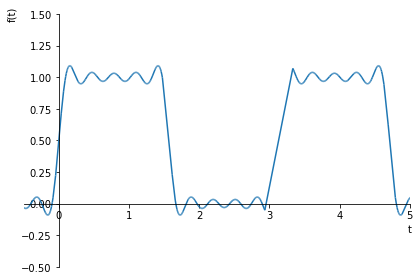

In [82]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
import matplotlib.pylab as plt
#Importamos todo el modulo sympy
from sympy import *
#ademas importamos las variables simbolicas 'n' y 't'
from sympy.abc import t, n

ao = integrate(2 / pi, (t, 0, pi / 2))
#integramos la funcion (2/pi) cuya variable es 't'
#y limites de integracion entre 0 y pi/2

print( "\n"+"a0 = " )
pprint(ao)
#Usamos la funcion pprint para mostrar ao


an = integrate((2 / pi) * cos(2 * n * t), (t, 0, pi / 2))
#integramos la funcion (2/pi)*cos(2nt)
#Su variable es 't' y sus limites de integracion son 0 y pi/2

print( "\n"+"an = ")
pprint(an)
#Usamos la funcion pprint para mostrar an

bn = together(integrate((2 / pi) * sin(2 * n * t), (t, 0, pi / 2)))
#integramos la funcion (2/pi*cos(2nt)
#Su variable es 't' y sus limites de integracion
#son 0 y pi/2. Ademas usamos la funcion "together"
#para simplificar la expresion

print ("\n"+"bn = ")
pprint(bn)
#Usamos la funcion pprint para mostrar bn

print( "\n"+"f(x) = ")

armonicos = 10
serie = (ao/2)
for i in range(1, armonicos + 1):
    serie = serie + (an*cos(2*n*t)).subs(n, i)
for j in range(1, armonicos + 1):
    serie = serie + (bn*sin(2*n*t)).subs(n, j)

pprint(serie)

plot(serie, ylim=(-0.5, 1.5), xlim=(-0.5,5)) #Usando el modulo para graficas de sympy
plt.show()